# Humanitarian Aid + Covid Risk Assessment

 1. Categorize all Countries that need humanitarian aid
 2. Store all these countries with their respective variables
 3. Find the data about Covid Risk in Countries - this might also include vaccination rates etc.
 4. Combine the Covid Risk of a Country + How much aid is needed to calculate a priority queue of where aid needs to go

In [59]:
import pandas as pd
humanitarian_data_path = "data/data-cRsVz.csv"
humanitarian_dataframe = pd.read_csv(humanitarian_data_path)

In [60]:
humanitarian_dataframe.head()

,Appeal,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022
0,:af: Afghanistan,HRP,24400000,22100000,4440000000,409413812.0,598923998.0,611759986.0,1.131051e+09,868666483.0,4440000000
1,:bf: Burkina Faso,HRP,3535864,3006940,561443902,61089000.0,90300000.0,186965134.0,4.243579e+08,607875894.0,600000000
2,:bi: Burundi,HRP,1780000,947000,183000000,73700000.0,141814441.0,106286557.0,1.978930e+08,194684000.0,183000000
3,:cm: Cameroon,HRP,4000000,2800000,371500000,238094671.0,319676453.0,298882369.0,3.909201e+08,361554315.0,371500000
4,:cf: CAR,HRP,3100000,2000000,461300000,497300000.0,515600000.0,430700000.0,5.536223e+08,444760000.0,461300000


In [61]:
humanitarian_dataframe.describe()

,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022
count,3.700000e+01,3.700000e+01,3.700000e+01,2.700000e+01,2.700000e+01,3.000000e+01,3.000000e+01,3.500000e+01,3.700000e+01
mean,7.416521e+06,4.934633e+06,1.109346e+09,9.286408e+08,1.048783e+09,1.001363e+09,1.116009e+09,9.873208e+08,1.080040e+09
std,7.498083e+06,5.578446e+06,1.370593e+09,1.220988e+09,1.215081e+09,1.311766e+09,1.259272e+09,1.255095e+09,1.343664e+09
min,3.038040e+05,1.639540e+05,4.391533e+07,1.024640e+07,9.030000e+07,3.243810e+07,4.334000e+07,4.215670e+07,4.391533e+07
25%,2.411000e+06,1.400000e+06,2.208000e+08,1.979161e+08,3.246210e+08,2.417639e+08,4.213757e+08,2.151396e+08,2.208000e+08
50%,4.000000e+06,2.560600e+06,5.317450e+08,4.973000e+08,5.687456e+08,6.161538e+08,6.634047e+08,5.632869e+08,5.350000e+08
75%,8.400000e+06,5.700000e+06,1.500000e+09,1.217216e+09,1.112494e+09,1.063660e+09,1.220866e+09,1.049240e+09,1.500000e+09
max,2.703000e+07,2.230000e+07,5.580000e+09,5.608952e+09,5.534931e+09,5.995976e+09,5.852037e+09,5.580000e+09,5.580000e+09


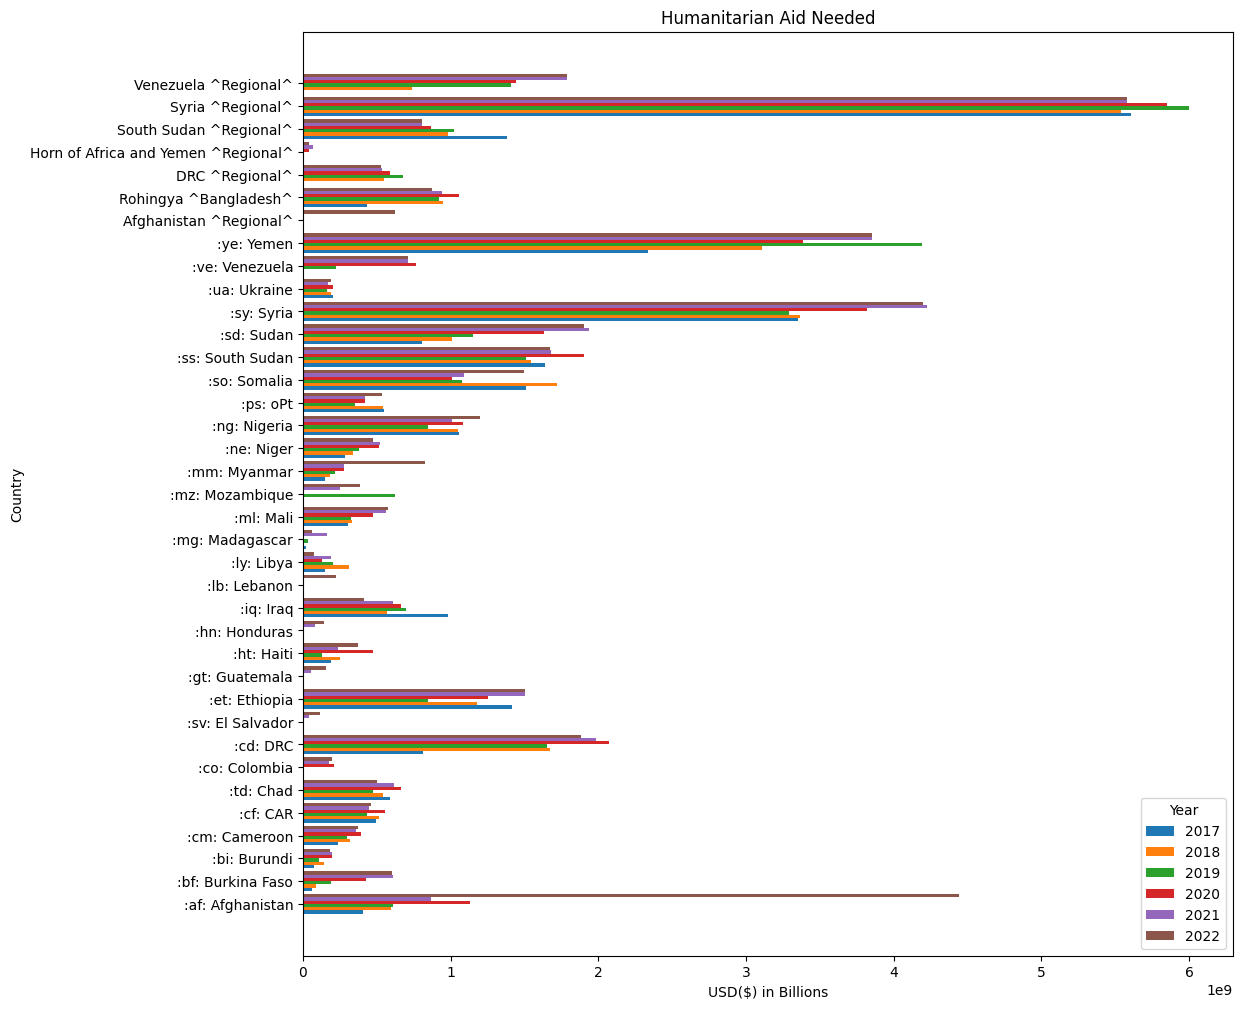

In [62]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(humanitarian_dataframe, columns=['2017', '2018', '2019', '2020', '2021', '2022', 'Appeal'])


plt.figure(figsize=(12, 12))

# Calculate the number of groups and bars
n_groups = len(df)
n_bars = len(df.columns) - 1  # Exclude the 'Appeal' column

# Set the bar width
bar_width = 4
# Set the spacing between groups
group_spacing = 4.0

# Calculate the y positions for each bar in each group
y_positions = np.arange(n_groups) * (n_bars * bar_width + group_spacing)

# Plot each year's data as a separate set of bars
for i, year in enumerate(['2017', '2018', '2019', '2020', '2021', '2022']):
    plt.barh(y_positions + i * bar_width, df[year], height=bar_width, label=year)

# Set y-ticks to be centered for each group
plt.yticks(y_positions + (n_bars / 2 - 0.5) * bar_width, df['Appeal'])

# Add labels and title
plt.xlabel("USD($) in Billions")
plt.ylabel("Country")
plt.title("Humanitarian Aid Needed")
plt.legend(title='Year')

# Save the figure
plt.savefig("figures/humanitarian_aid_needed.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [63]:
covid_data_path = "data/data.csv"
covid_df = pd.read_csv(covid_data_path)
# Risk Level: [1, 2, 3, 4]
# 1: <1 
# 2: 1-9
# 3: 10-24
# 4: 25+
# Source: https://globalepidemics.org/key-metrics-for-covid-suppression/

In [64]:
covid_df.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0,Epidemic intelligence national data,NaN
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.0,0,Epidemic intelligence national data,NaN
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.0,0,Epidemic intelligence national data,NaN
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.0,0,Epidemic intelligence national data,NaN
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.0,0,Epidemic intelligence national data,NaN


In [65]:
covid_df.describe()

,population,weekly_count,rate_14_day,cumulative_count
count,4.852200e+04,4.813600e+04,47680.000000,4.852200e+04
mean,7.546809e+07,2.286615e+04,135.099602,7.444876e+05
std,3.597248e+08,2.284921e+05,553.122104,6.165084e+06
min,8.090000e+02,-3.864000e+03,-67.134760,0.000000e+00
25%,8.964440e+05,2.000000e+00,0.463168,1.060000e+02
50%,7.132530e+06,5.800000e+01,8.263081,2.989500e+03
75%,2.982597e+07,1.134000e+03,62.581787,4.908150e+04
max,4.498460e+09,1.155454e+07,20394.965722,1.996030e+08


In [66]:
# Country: [Cases per 100,000, Risk Level]
countries_current_cases = {}
most_recent_date = '2022-13'
counter = 0 

for dates in covid_df['year_week']:
  if most_recent_date == dates: 
    if covid_df['indicator'][counter] == 'cases' and pd.notnull(covid_df['country_code'][counter]):

      countries_current_cases[covid_df['country'][counter]] = [covid_df['rate_14_day'][counter]]

      # Categorizing countries' risk level
      if covid_df['rate_14_day'][counter] >= 25:
        countries_current_cases[covid_df['country'][counter]].append(4)
      elif covid_df['rate_14_day'][counter] >= 10:
        countries_current_cases[covid_df['country'][counter]].append(3)
      elif covid_df['rate_14_day'][counter] >= 1:
        countries_current_cases[covid_df['country'][counter]].append(2)
      else:
        countries_current_cases[covid_df['country'][counter]].append(1)
  counter+=1

print(countries_current_cases)

{'Afghanistan': [1.8135887167655047, 2], 'Albania': [27.4775953941647, 4], 'Algeria': [0.3055799607776718, 1], 'American Samoa': [4983.966519919561, 4], 'Andorra': [1037.0584297097548, 4], 'Angola': [0.5507166192401279, 1], 'Anguilla': [706.5724570057325, 4], 'Antigua And Barbuda': [20.42316804182665, 3], 'Argentina': [69.93352498398247, 4], 'Armenia': [8.537968989286705, 2], 'Aruba': [230.41043028679545, 4], 'Australia': [3037.8024117053724, 4], 'Austria': [4507.944218803505, 4], 'Azerbaijan': [5.710523785219212, 2], 'Bahamas': [15.766132313451054, 3], 'Bahrain': [669.3766921742871, 4], 'Bangladesh': [0.7049634766073536, 1], 'Barbados': [821.2380511603467, 4], 'Belarus': [147.05818545057363, 4], 'Belgium': [1285.8821569042668, 4], 'Belize': [36.71838258039691, 4], 'Benin': [0.0, 1], 'Bermuda': [534.7421836108747, 4], 'Bhutan': [1222.5056116286423, 4], 'Bolivia': [22.796139716606547, 3], 'Bonaire, Saint Eustatius And Saba': [3218.794096334999, 4], 'Bosnia And Herzegovina': [44.47065744

In [67]:
countryList = humanitarian_dataframe['Appeal']

country_covid_case_rates = []
country_risk_levels=[]
lstrip_countries = []

for country in countryList:
  lstrip_countries.append(country.lstrip())

for country in countries_current_cases:
  if country not in lstrip_countries:
    for data in countries_current_cases[country]:
      country_covid_case_rates.append(data)
    country_risk_levels.append(country_covid_case_rates.pop())

In [68]:
level_1_risk=0
level_2_risk=0
level_3_risk=0
level_4_risk=0

for risk_level in country_risk_levels:
  if risk_level == 1:
    level_1_risk += 1
  elif risk_level == 2:
    level_2_risk += 1
  elif risk_level == 3:
    level_3_risk += 1
  elif risk_level == 4:
    level_4_risk += 1

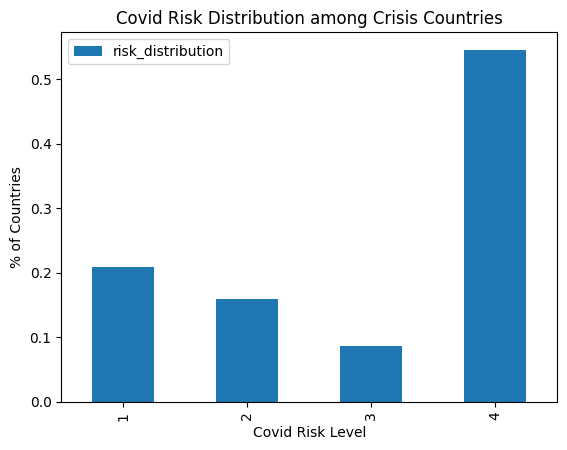

In [69]:
risk_distribution = []
risk_distribution.append(level_1_risk/len(country_risk_levels))
risk_distribution.append(level_2_risk/len(country_risk_levels))
risk_distribution.append(level_3_risk/len(country_risk_levels))
risk_distribution.append(level_4_risk/len(country_risk_levels))

risk_levels = [1, 2, 3, 4]
df = pd.DataFrame()
df['risk_distribution'] = risk_distribution
df['risk_levels'] = risk_levels

df.plot(x='risk_levels', y='risk_distribution', kind="bar")
plt.title('Covid Risk Distribution among Crisis Countries')
plt.ylabel('% of Countries')
plt.xlabel('Covid Risk Level')
plt.savefig("figures/country_covid_risk_distribution.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [70]:
country_list = []
cases_list = []
risk_levels = []
covid_risk_dict = {}
counter = 0

for country in countries_current_cases:
  country_list.append(country)
  for data in countries_current_cases[country]:
    cases_list.append(data)
  risk_levels.append(cases_list.pop())

covid_risk_dict['Country'] = country_list
covid_risk_dict['Cases'] = cases_list
covid_risk_dict['Level of Risk'] = risk_levels
covid_risk = pd.DataFrame(covid_risk_dict)

# Sort values by the # of Covid Cases
covid_risk = covid_risk.sort_values(by='Cases', ascending=False)

humanitarian_dataframe = humanitarian_dataframe.rename(columns = {'Appeal': 'Country'})

for country in humanitarian_dataframe['Country']:
    split_country_string = country.split(':')

    if len(split_country_string) == 3:
      humanitarian_dataframe=humanitarian_dataframe.replace(country,split_country_string[2].rstrip(), regex = True)

humanitarian_dataframe=humanitarian_dataframe.drop([30, 31, 32, 33, 34, 35, 36])

covid_risk.head()

,Country,Cases,Level of Risk
184,South Korea,8618.415082,4
46,Cook Islands,8318.150763,4
84,Guernsey,6837.500776,4
52,Cyprus,6649.061661,4
3,American Samoa,4983.966520,4


In [71]:
# Combine original humanitarian dataframe with covid risk & case dataframe
combined_df = humanitarian_dataframe.join(covid_risk, lsuffix=('Country'))

counter = 0
calculated_risk = []

for risk_levels in combined_df['Level of Risk']:
  calculated_risk.append(risk_levels * combined_df['People in need'][counter])
  counter+=1

combined_df['Caculated Risk'] = calculated_risk

combined_df = combined_df.drop(columns=['Country'])
combined_df = combined_df.rename(columns = {'CountryCountry': 'Country'})
combined_df

,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000
1,Burkina Faso,HRP,3535864,3006940,561443902,6.108900e+07,9.030000e+07,1.869651e+08,4.243579e+08,6.078759e+08,600000000,27.477595,4,14143456
2,Burundi,HRP,1780000,947000,183000000,7.370000e+07,1.418144e+08,1.062866e+08,1.978930e+08,1.946840e+08,183000000,0.305580,1,1780000
3,Cameroon,HRP,4000000,2800000,371500000,2.380947e+08,3.196765e+08,2.988824e+08,3.909201e+08,3.615543e+08,371500000,4983.966520,4,16000000
4,CAR,HRP,3100000,2000000,461300000,4.973000e+08,5.156000e+08,4.307000e+08,5.536223e+08,4.447600e+08,461300000,1037.058430,4,12400000
5,Chad,HRP,5500000,3500000,500000000,5.886083e+08,5.437692e+08,4.766412e+08,6.646412e+08,6.175224e+08,500000000,0.550717,1,5500000
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000
8,El Salvador,HRP,1700000,912200,114343302,NaN,NaN,NaN,NaN,4.215670e+07,114343302,69.933525,4,6800000
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000


In [72]:
# Sort countries by calculated risk in descending order
combined_df = combined_df.sort_values(by=['Caculated Risk'], ascending = False)
combined_df

,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk
29,Yemen,HRP,20700000,16000000,3850000000,2.338796e+09,3.108068e+09,4.192680e+09,3.382682e+09,3.853456e+09,3850000000,122.366637,4,82800000
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000
19,Myanmar,HRP,14400000,6200000,826000000,1.503000e+08,1.834000e+08,2.143600e+08,2.753000e+08,2.764559e+08,826000000,1285.882157,4,57600000
25,Sudan,HRP,14300000,10900000,1900000000,8.039662e+08,1.007555e+09,1.149289e+09,1.633403e+09,1.939815e+09,1900000000,3218.794096,4,57200000
26,Syria,HRP,14000000,12000000,4200000000,3.351304e+09,3.364411e+09,3.293416e+09,3.817533e+09,4.224417e+09,4200000000,44.470657,4,56000000
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000
23,Somalia,HRP,7700000,5500000,1500000000,1.507847e+09,1.717890e+09,1.077453e+09,1.009927e+09,1.092122e+09,1500000000,1222.505612,4,30800000
28,Venezuela,HRP,7000000,4500000,708100000,NaN,NaN,2.227244e+08,7.625094e+08,7.080981e+08,708100000,168.349640,4,28000000


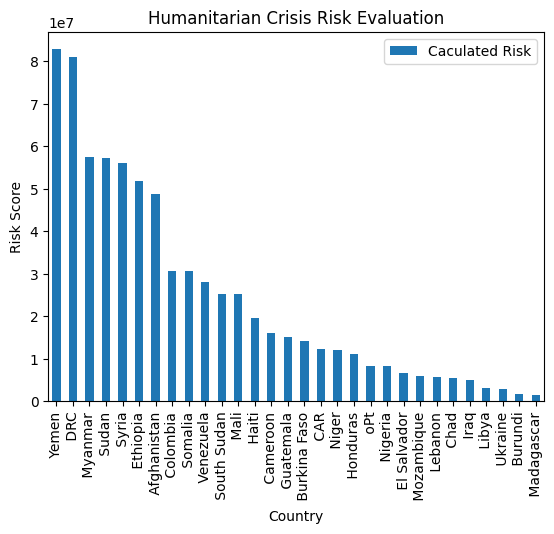

In [73]:
df = pd.DataFrame(combined_df,columns=['Country', 'Caculated Risk'])
df.plot(x='Country', y='Caculated Risk', kind="bar")
plt.title('Humanitarian Crisis Risk Evaluation')
plt.ylabel('Risk Score')
plt.savefig("figures/humanitarian_crisis_risk_evaluation.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [74]:
calulated_risk_sum = 0
calulated_risk_list = []
risk_percentages = []

for risk_value in combined_df['Caculated Risk']:
  calulated_risk_sum+=risk_value
  calulated_risk_list.append(risk_value)

for risk_value in calulated_risk_list:
  risk_percentages.append(round(((risk_value / calulated_risk_sum) * 100), 2))

combined_df['Percentage of Aid Needed'] = risk_percentages

combined_df

,Country,Type,People in need,People targeted,Requirements (US$),2017,2018,2019,2020,2021,2022,Cases,Level of Risk,Caculated Risk,Percentage of Aid Needed
29,Yemen,HRP,20700000,16000000,3850000000,2.338796e+09,3.108068e+09,4.192680e+09,3.382682e+09,3.853456e+09,3850000000,122.366637,4,82800000,11.33
7,DRC,HRP,27030000,8800000,1880000000,8.126143e+08,1.675200e+09,1.653700e+09,2.069135e+09,1.984303e+09,1880000000,20.423168,3,81090000,11.09
19,Myanmar,HRP,14400000,6200000,826000000,1.503000e+08,1.834000e+08,2.143600e+08,2.753000e+08,2.764559e+08,826000000,1285.882157,4,57600000,7.88
25,Sudan,HRP,14300000,10900000,1900000000,8.039662e+08,1.007555e+09,1.149289e+09,1.633403e+09,1.939815e+09,1900000000,3218.794096,4,57200000,7.82
26,Syria,HRP,14000000,12000000,4200000000,3.351304e+09,3.364411e+09,3.293416e+09,3.817533e+09,4.224417e+09,4200000000,44.470657,4,56000000,7.66
9,Ethiopia,HRP,25900000,22300000,2750000000,1.417400e+09,1.177219e+09,8.445485e+08,1.250804e+09,1.502100e+09,1502100000,8.537969,2,51800000,7.09
0,Afghanistan,HRP,24400000,22100000,4440000000,4.094138e+08,5.989240e+08,6.117600e+08,1.131051e+09,8.686665e+08,4440000000,1.813589,2,48800000,6.68
6,Colombia,HRP,7700000,2000000,200000000,NaN,NaN,NaN,2.097000e+08,1.740103e+08,200000000,706.572457,4,30800000,4.21
23,Somalia,HRP,7700000,5500000,1500000000,1.507847e+09,1.717890e+09,1.077453e+09,1.009927e+09,1.092122e+09,1500000000,1222.505612,4,30800000,4.21
28,Venezuela,HRP,7000000,4500000,708100000,NaN,NaN,2.227244e+08,7.625094e+08,7.080981e+08,708100000,168.349640,4,28000000,3.83
